# Homogeneous ensemble methods

## Homogeneous ensembling in Python


#### Import libraries and data 

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("https://github.com/Explore-AI/Public-Data/blob/master/house_price_by_area.csv?raw=true")
df.head()

,LotArea,SalePrice
0,138,1204000
1,145,1274000
2,152,1673000
3,152,1232000
4,152,1195600


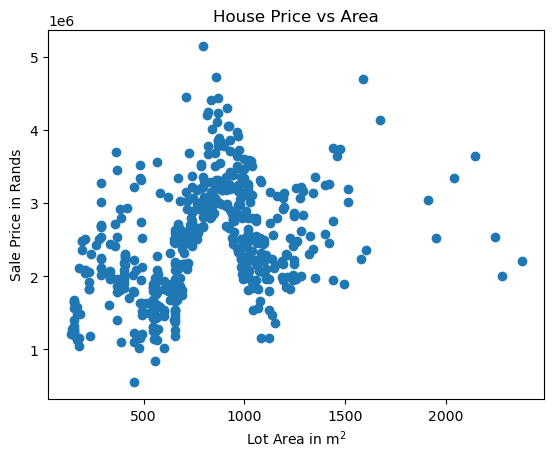

In [3]:
X = df["LotArea"] # Independent variable
y = df["SalePrice"] # Dependent variable

plt.scatter(X,y) # Create scatter plot
plt.title("House Price vs Area")
plt.xlabel("Lot Area in m$^2$")
plt.ylabel("Sale Price in Rands")
plt.show()

#### Pre-processing

In [4]:
# Initialise the scalers
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(np.array(X)[:,np.newaxis]) 
y_scaled = y_scaler.fit_transform(np.array(y)[:,np.newaxis]) 

# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=6)

### a) Bagging (AKA bootstrap aggregating)

In [5]:
# Importing the BaggingRegressor class from sklearn
from sklearn.ensemble import BaggingRegressor

**Building the bagging ensemble:**

In [6]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=4)

# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(estimator = d_tree)

**Training the bagging ensemble:**

In [7]:
bag_reg.fit(x_train,y_train[:,0])

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4))

**Checking the performance of the bagging ensemble:**

RMSE:  0.7689729294646733


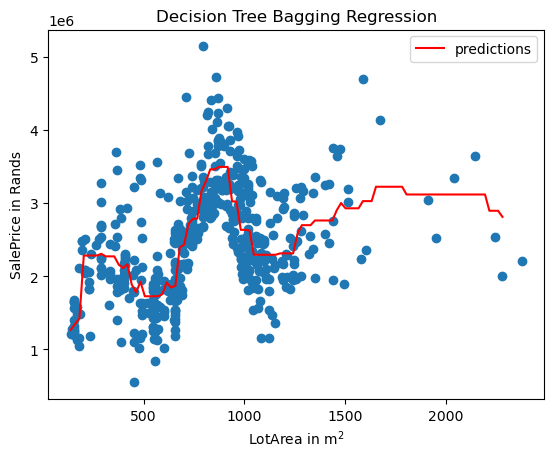

In [8]:
y_pred = bag_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the bagging regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Bagging Regression")
plt.legend()
plt.show()

When we try and run the above code cells a couple of times, we observe that the **RMSE error metric changes**. This occurs due to the random sampling process that is used to build our ensemble. 

As such, it's often good practice to manually set or record the `random_state` variable used to derive a specific result. This allows your work to be reproducible and easy to share with others.   

### b) Boosting

In [9]:
# Importing the AdaBoostRegressor class from sklearn
from sklearn.ensemble import AdaBoostRegressor

**Building the boosting ensemble:**

In [10]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=3)

# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(estimator = d_tree)

**Training the boosting ensemble:**

In [11]:
bst_reg.fit(x_train,y_train[:,0])

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3))

**Checking the performance of the boosting ensemble:**

RMSE:  0.791832327097498


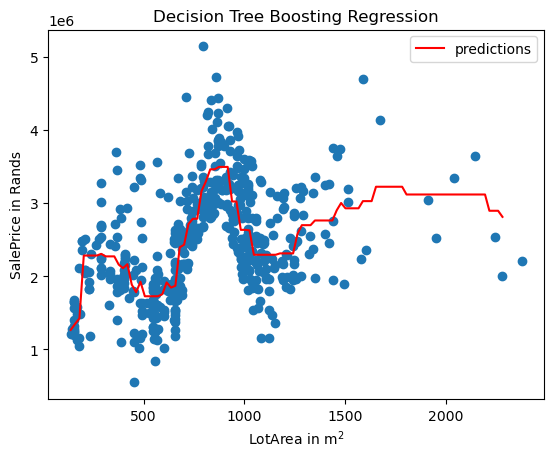

In [12]:
y_pred = bst_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the boosting regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain) 

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Boosting Regression")
plt.legend()
plt.show()